In [134]:
import pandas as pd
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english')) 
from collections import Counter
import seaborn as sns
import numpy as np

from datasets import list_datasets, load_dataset

In [136]:
list_datasets()

['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'amttl',
 'anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'aslg_pc12',
 'asnq',
 'asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'blended_skill_talk',
 'blimp',
 'blog_authorship_corpus',
 'bn_hate_speech',
 'bookcorpus',
 'bookcorpusopen',
 'boolq',
 'bprec',
 'break_data',
 'brwac',
 'bsd_ja_en',
 'bswac',
 'c3',
 'c4',
 'cail2018',
 'caner',
 'capes',
 'catalonia_independence',
 'cawac'

In [ ]:
load_dataset(path='bookcorpus', split='train', cache_dir='./datasets/')

In [ ]:
load_dataset(path='ag_news', cache_dir='./datasets/')

In [ ]:
load_dataset(path='openwebtext', cache_dir='./datasets/')

In [99]:
# load different corpora in dataframes
df_train = pd.read_csv('./datasets/training_set', delimiter=',')
df_sdg = df_train[df_train.loc[:, 'labels'] != 0]
df_monster = pd.read_csv('./datasets/monster_com-job_sample.csv')
df_indeed = pd.read_csv('./datasets/indeed_job_data_raw.csv')
df_wiki = pd.read_csv('./datasets/wikisent2.txt')

In [101]:
def get_words(sentences):
    """
    Concatenate sentences made out of word tokens.
    return single list of words
    """
    words = []
    for sentence in sentences:
        words += sentence
    return words

In [102]:
# create word lists from datasets
wiki_words = get_words([word_tokenize(sentence) for sentence in list(df_wiki['sentence'].values)])
sdg_words = get_words([word_tokenize(sentence) for sentence in list(df_sdg['sentence'].values)])
indeed_words = get_words([word_tokenize(sentence) for sentence in list(df_indeed['text_en'].values)])
monster_words = get_words([word_tokenize(sentence) for sentence in list(df_monster['job_description'].values)])

In [107]:
# clean word lists from stopwords
wiki_filtered = [w for w in wiki_words if not w in stop_words] 
sdg_filtered = [w for w in sdg_words if not w in stop_words] 
indeed_filtered = [w for w in indeed_words if not w in stop_words] 
monster_filtered = [w for w in monster_words if not w in stop_words] 

In [108]:
# init counter object with word list
WikiCounter = Counter(wiki_filtered)
SDGCounter = Counter(sdg_filtered)
IndeedCounter = Counter(indeed_filtered)
MonsterCounter = Counter(monster_filtered)

In [109]:
# draw the 10,000 most common words for each corpus
nb_most = 10000
wiki_most_nb = WikiCounter.most_common(nb_most)
sdg_most_nb = SDGCounter.most_common(nb_most)
indeed_most_nb = IndeedCounter.most_common(nb_most)
monster_most_nb = MonsterCounter.most_common(nb_most)

In [110]:
# remove counts ang get list of most frequent words only
wiki_most = [w[0] for w in wiki_most_nb]
sdg_most = [w[0] for w in sdg_most_nb]
indeed_most = [w[0] for w in indeed_most_nb]
monster_most = [w[0] for w in monster_most_nb]

In [128]:
# calculate percentage intersections between corpora
wiki_sdg = len(list(set(wiki_most) & set(sdg_most))) / nb_most
wiki_monster = len(list(set(wiki_most) & set(monster_most))) / nb_most
wiki_indeed = len(list(set(wiki_most) & set(indeed_most))) / nb_most
sdg_monster = len(list(set(sdg_most) & set(monster_most))) / nb_most
sdg_indeed = len(list(set(sdg_most) & set(indeed_most))) / nb_most
monster_indeed = len(list(set(monster_most) & set(indeed_most))) / nb_most

In [129]:
# manually curate overlap matrix and annotation for corpora similarity
cm = np.array([[1, wiki_sdg, wiki_monster, wiki_indeed],
               [wiki_sdg, 1, sdg_monster, sdg_indeed],
               [wiki_indeed, sdg_indeed, 1, monster_indeed],
               [wiki_monster, sdg_monster, monster_indeed, 1]])

annot = ['{0:.2f}%'.format(float(a)*100) for a in np.array(cm).flatten()]
annot = np.asarray(annot).reshape(cm.shape[0],cm.shape[1])

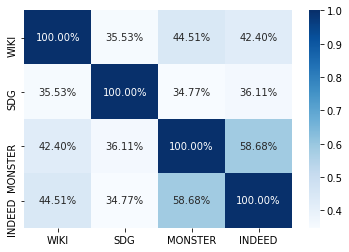

In [133]:
# print corpora similarity matrix
sns_plot = sns.heatmap(data=cm, 
                       cmap='Blues', 
                       fmt='4', 
                       xticklabels=['WIKI', 'SDG', 'MONSTER', 'INDEED'], 
                       yticklabels=['WIKI', 'SDG', 'MONSTER', 'INDEED'], 
                       annot=annot)
fig = sns_plot.get_figure()
fig.savefig("./plots/corpora_similarity_matrix.png")